In [2]:
# Cell 1: Install and Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
# Cell 2: Load and Prepare the MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Normalize image pixels (0-255 to 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# CNN expects 4D input: (samples, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [4]:
# Cell 3: Build the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Cell 4: Compile the Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [6]:
# Cell 5: Train the Model
history = model.fit(x_train, y_train, epochs=5,
                    batch_size=64,
                    validation_split=0.1)



Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8891 - loss: 0.3718 - val_accuracy: 0.9865 - val_loss: 0.0461
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9918 - val_loss: 0.0295
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9882 - val_loss: 0.0396
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9913 - val_loss: 0.0361


In [7]:
# Cell 6: Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")



313/313 - 2s - 7ms/step - accuracy: 0.9907 - loss: 0.0289
Test accuracy: 0.9907000064849854


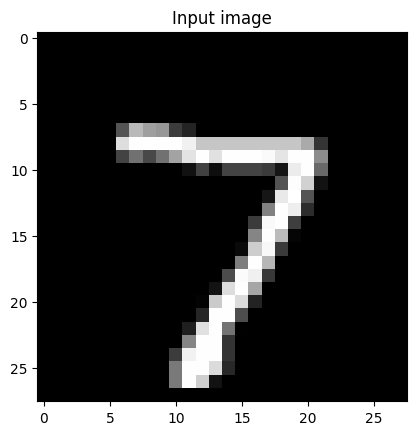

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted label: 7


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from test set
img = x_test[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.title("Input image")
plt.show()

# Predict label
pred = model.predict(np.expand_dims(img, axis=0))
pred_label = np.argmax(pred)
print(f"Predicted label: {pred_label}")


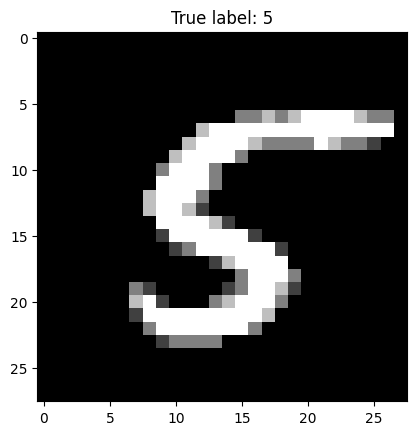

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted label: 5



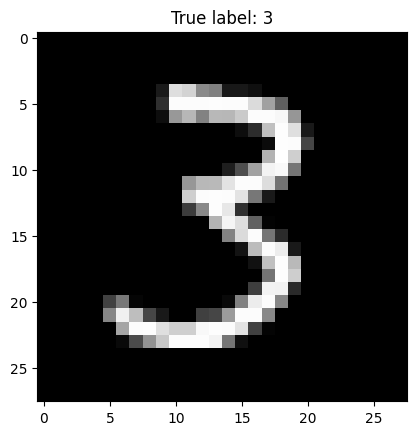

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted label: 3



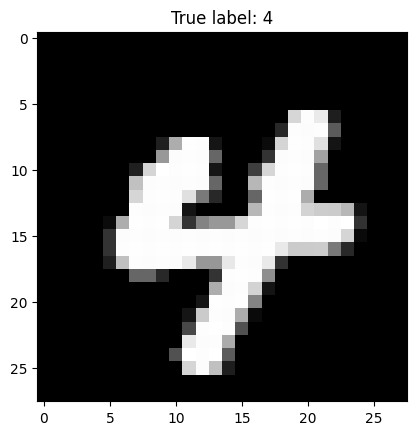

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted label: 4



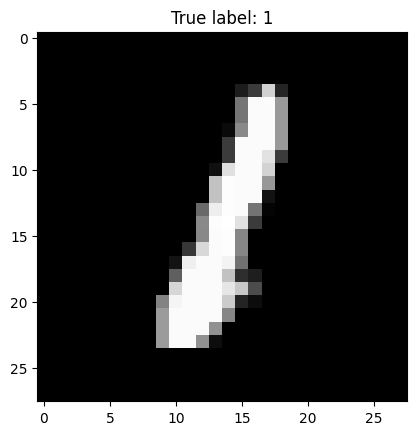

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted label: 1



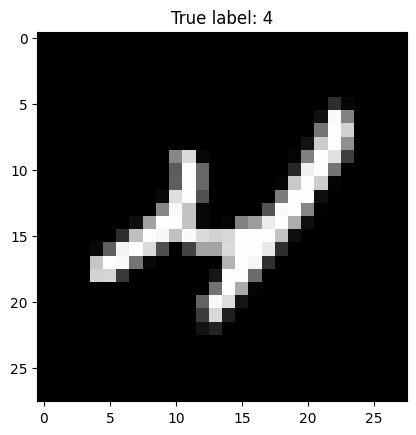

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted label: 4



In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Number of images you want to test
num_images = 5

for _ in range(num_images):
    idx = random.randint(0, len(x_test) - 1)  # Pick a random index
    img = x_test[idx]
    true_label = y_test[idx]

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True label: {true_label}")
    plt.show()

    pred = model.predict(np.expand_dims(img, axis=0))
    pred_label = np.argmax(pred)
    print(f"Predicted label: {pred_label}\n")


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [11]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()


In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [13]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 111s 155ms/step - accuracy: 0.3801 - loss: 1.6899 - val_accuracy: 0.6132 - val_loss: 1.1008
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 153ms/step - accuracy: 0.6316 - loss: 1.0569 - val_accuracy: 0.6868 - val_loss: 0.9149
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 109s 155ms/step - accuracy: 0.7097 - loss: 0.8342 - val_accuracy: 0.6988 - val_loss: 0.8763
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 109s 155ms/step - accuracy: 0.7580 - loss: 0.6940 - val_accuracy: 0.7304 - val_loss: 0.7841
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 155ms/step - accuracy: 0.8027 - loss: 0.5696 - val_accuracy: 0.6996 - val_loss: 0.9487
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 108s 153ms/step - accuracy: 0.8425 - loss: 0.4540 - val_accuracy: 0.7434 - val_loss: 0.8188
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 145s 158ms/step - accuracy: 0.8767 - loss: 0.3554 - val_accuracy: 0.7350 - val_loss: 0.9130
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 140s 154ms/step - accuracy: 0.9148 -

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 6s - 20ms/step - accuracy: 0.7255 - loss: 1.2143
Test accuracy: 0.7254999876022339


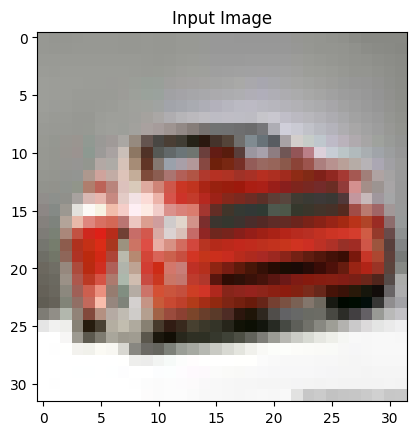

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
True label: automobile
Predicted label: automobile


In [17]:
import random
idx = random.randint(0, len(x_test) - 1)
img = x_test[idx]
plt.imshow(img)
plt.title("Input Image")
plt.show()

pred = model.predict(np.expand_dims(img, axis=0))
pred_label = class_names[np.argmax(pred)]
true_label = class_names[y_test[idx]]
print(f"True label: {true_label}")
print(f"Predicted label: {pred_label}")


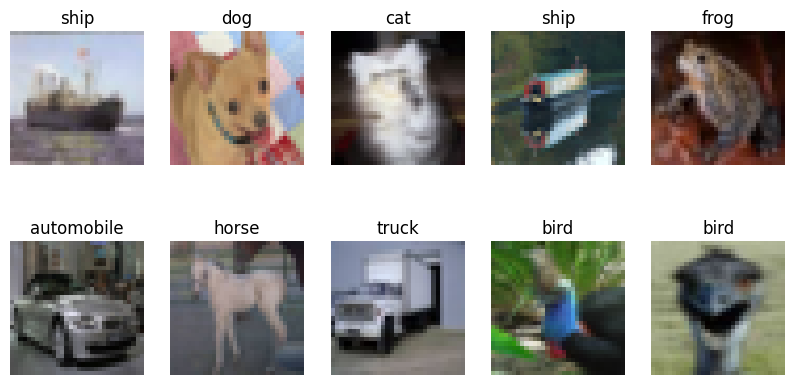

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)
    img = x_test[idx]
    label = class_names[y_test[idx]]
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()


In [19]:
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5


In [20]:
model.save('mnist_cnn_model.keras')
print("Model saved as mnist_cnn_model.keras")


Model saved as mnist_cnn_model.keras
